In [68]:
import pandas as pd
from statistics import mean
from scipy.stats import sem
import matplotlib.pyplot as plt

In [69]:
data =pd.read_csv('housing_data.csv',header=None,names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO'
                                                      ,'B','LSTAT','MEDV'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [70]:
# Shuffle Data + Creating a bunch of Samples

shuffled = data.sample(frac=1).reset_index(drop=True)
div = 20
lim = len(shuffled) // div
samples = [shuffled.iloc[(i * div):(i * div + div), 13]
            for i in range(0,lim)]


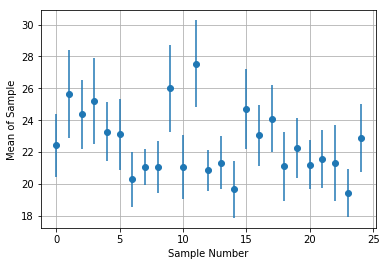

In [71]:
# Calculate the Means, Standard Error, and Plot

means = [mean(i) for i in samples]
standard_e = [sem(i)for i in samples]
x = range(0,len(samples))
plt.errorbar(x, means, yerr=standard_e, fmt='o')
plt.ylabel('Mean of Sample')
plt.xlabel('Sample Number')
plt.grid()

In [72]:
# T-Test, Can only be used for two samples

from random import randint
import numpy as np
from scipy.stats import ttest_ind

wba = pd.read_csv('wba_data.csv')
sample = pd.read_csv('general_heights.csv')

heights = sample.astype('int64')

mean_height = mean(wba.iloc[:,-1])
mean_sample_height = mean(heights.iloc[:,-1])

print("Mean Height of Women BB Players: " + str(mean_height))
print("Mean Height of Sampled Women BB Players: "+str(mean_sample_height))

t, p = ttest_ind(wba.iloc[:,-1],heights)
print("T Statistic (Higher Val = Samples come from 2 Diff Pop's): "+str(t[0]))
print("P Val (<.05 = They are From Two Diff Pop's): "+str(p[0]))

Mean Height of Women BB Players: 72.32
Mean Height of Sampled Women BB Players: 64.65
T Statistic (Higher Val = Samples come from 2 Diff Pop's): 16.6616700596016
P Val (<.05 = They are From Two Diff Pop's): 5.475440583739991e-47


(64, 73)

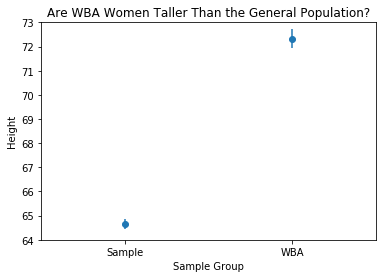

In [77]:
sample_stan = sem(sample)
wba_stan = sem(wba.iloc[:,-1])

x = ['Sample','WBA']
mean = [mean_sample_height,mean_height]
stan = [sample_stan,wba_stan]

plt.errorbar(x,mean,yerr=stan,fmt='o')
plt.xlabel("Sample Group")
plt.ylabel("Height")
plt.title("Are WBA Women Taller Than the General Population?",fontsize=12)
plt.xlim(-0.5,1.5)
plt.ylim(64,73)


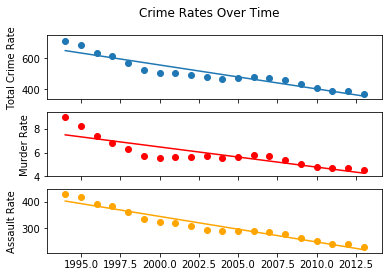

In [143]:
# Fits and Regression Using SciPy

from scipy.stats import linregress

data = pd.read_csv('crime_data.csv')
year = data.iloc[:,0]
total_crime_rate = data.iloc[:,3]
murder_rate = data.iloc[:,5]
assault_rate = data.iloc[:,11]

slopeT, interceptT, r_value, std_err, p_value = linregress(year,total_crime_rate)
slopeM, interceptM, r_value, std_err, p_value = linregress(year,murder_rate)
slopeA, interceptA, r_value, std_err, p_value = linregress(year,assault_rate)

fit_T = slopeT * year + interceptT
fit_M = slopeM * year + interceptM
fit_A = slopeA * year + interceptA

fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)

fig.suptitle("Crime Rates Over Time")

ax1.plot(year, fit_T,label='Total Crime Rate')
ax1.scatter(year,total_crime_rate)
ax1.set_ylabel('Total Crime Rate')

ax2.plot(year, fit_M,label='Murder Rate',color='r')
ax2.scatter(year,murder_rate,color='r')
ax2.set_ylabel('Murder Rate')

ax3.plot(year, fit_A,label='Assault Rate',color='orange')
ax3.scatter(year,assault_rate,color='orange')
ax3.set_ylabel('Assault Rate')

plt.show()

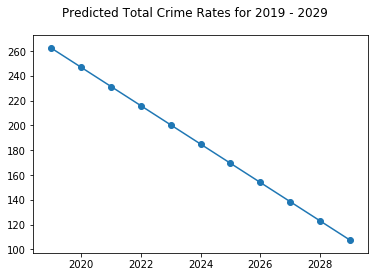

In [155]:
# Utilizing the Regression to Predict Total Crime Rates for 2019 - 2029

year = range(2019,2030)
predicted_crime = slopeT * year + interceptT

fig, ax = plt.subplots()

ax.plot(year,predicted_crime)
ax.scatter(year,predicted_crime,marker='o')

fig.suptitle('Predicted Total Crime Rates for 2019 - 2029')
plt.show()